This notebook is used to clean, organize and unify all of the electoral data for Catalunya.

# 1. Libraries

In [2]:
import pandas as pd
import os
import re

# 2. Importing the data

Preliminary view. There are 3 different files for each election:
- "Columnes" (columns).
- "Participació" (turnout).
- "Vots" (votes).

## Preview

In [65]:
reg_2021_columns = pd.read_csv('data/1_election_outcomes/catalunya_results/regional/A20211_SE/A20211-Columnes-SE.csv', delimiter = ';')
reg_2021_columns.head()

,﻿Codi Província,Nom Província,Codi Vegueria,Nom Vegueria,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,...,PCTC Vots,IZQP Vots,SOM TERRES DE L'EBRE Vots,PUM+J Vots,UEP Vots,EB Vots,UNIDOS SI-DEf-PDSJE-SOMOS ESPAÑA Vots,ALIANZA C V Vots,SCAT Vots,M.C.R. Vots
0,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,...,0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN
1,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,...,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,3,...,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,4,...,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
reg_2021_participacio = pd.read_csv('data/1_election_outcomes/catalunya_results/regional/A20211_SE/A20211-Participació-SE.csv', delimiter = ';')
reg_2021_participacio.head()

,﻿Codi Província,Nom Província,Codi Vegueria,Nom Vegueria,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Població,Cens,Participació 13:00,Participació 18:00,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids
0,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,NaN,134,25,48,62,72,0,2,60,62
1,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,NaN,1143,311,530,623,520,9,7,607,614
2,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,NaN,1309,340,566,666,643,9,4,653,657
3,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,3,NaN,614,159,332,387,227,5,4,378,382
4,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,4,NaN,1421,377,738,830,591,13,9,808,817


In [67]:
reg_2021_votes = pd.read_csv('data/1_election_outcomes/catalunya_results/regional/A20211_SE/A20211-Vots-SE.csv', delimiter = ';')
reg_2021_votes.head()

,﻿Codi Província,Nom Província,Codi Vegueria,Nom Vegueria,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots
0,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,JxCat,Junts per Catalunya,29
1,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,16
2,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,CUP-G,Canditatura d'Unitat Popular-Un Nou Cicle per ...,9
3,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),3
4,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,ECP-PEC,En Comú Podem-Podem en Comú,2


The first dataset ("Columnes") aggregates all of the information, but in a format that is a bit uncomfortable: the number of votes for each political party is saved in a separate column. On the other hand, both "Votes" and "Participació" are relevant, as the first contains the votes per each *sección censal* and the second contains information on the people who were able to vote and the turnover.

## Importing and concatenating all of the results

Below, we import all of the csv files separately, for the number of votes ("Votes") and turnover ("Participació").

### Regional elections

In [68]:
# Define the base directory where the subfolders are located
base_path = 'data/1_election_outcomes/catalunya_results/regional'

# Compile regular expressions to match the two file types
# The regex captures the year (one or more digits) and the single digit
pattern_participacio = re.compile(r"A(\d{4})(\d)-Participació-SE\.csv$")
pattern_vots = re.compile(r"A(\d{4})(\d)-Vots-SE\.csv$")

# Dictionaries to store the DataFrames
dfs_participacio = {}
dfs_vots = {}

# Walk through the folder structure
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Try to match the file against the Participació pattern
        match_participacio = pattern_participacio.match(file)
        # Try to match the file against the Vots pattern
        match_vots = pattern_vots.match(file)
        
        # If file is a Participació file
        if match_participacio:
            year, digit = match_participacio.group(1), match_participacio.group(2)
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, delimiter = ';')
            # Add additional columns
            df['year_election'] = year
            df['election_number'] = digit
            # Save DataFrame in the dictionary with filename as key (or any other unique key)
            dfs_participacio[file] = df

        # If file is a Vots file
        elif match_vots:
            year, digit = match_vots.group(1), match_vots.group(2)
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, delimiter = ';')
            # Add additional columns
            df['year_election'] = year
            df['election_number'] = digit
            # Save DataFrame in the dictionary with filename as key
            dfs_vots[file] = df

# Print keys to check if everything is okay
print(dfs_participacio.keys())
print(dfs_vots.keys())

# Create data frames with the results for all elections
df_reg_turnout = pd.concat(dfs_participacio, ignore_index=True)
df_reg_votes = pd.concat(dfs_vots, ignore_index=True)

dict_keys(['A19991-Participació-SE.csv', 'A20031-Participació-SE.csv', 'A20061-Participació-SE.csv', 'A20101-Participació-SE.csv', 'A20121-Participació-SE.csv', 'A20151-Participació-SE.csv', 'A20171-Participació-SE.csv', 'A20211-Participació-SE.csv', 'A20241-Participació-SE.csv'])
dict_keys(['A19991-Vots-SE.csv', 'A20031-Vots-SE.csv', 'A20061-Vots-SE.csv', 'A20101-Vots-SE.csv', 'A20121-Vots-SE.csv', 'A20151-Vots-SE.csv', 'A20171-Vots-SE.csv', 'A20211-Vots-SE.csv', 'A20241-Vots-SE.csv'])


In [69]:
df_reg_turnout.head()

,﻿Codi Província,Nom Província,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Població,Cens,...,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,Codi Vegueria,Nom Vegueria
0,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,NaN,142,...,83,59,0,0,83,83,1999,1,NaN,NaN
1,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,NaN,1081,...,745,336,1,8,736,744,1999,1,NaN,NaN
2,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,NaN,1909,...,1089,820,2,4,1083,1087,1999,1,NaN,NaN
3,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,3,NaN,418,...,220,198,0,1,219,220,1999,1,NaN,NaN
4,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,4,NaN,650,...,365,285,0,3,362,365,1999,1,NaN,NaN


In [70]:
df_reg_votes.head()

,﻿Codi Província,Nom Província,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,Codi Vegueria,Nom Vegueria
0,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,CiU,Convergència i Unió ...,56,1999,1,NaN,NaN
1,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,NaN,NaN
2,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,PP,Partit Popular,6,1999,1,NaN,NaN
3,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,6,1999,1,NaN,NaN
4,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,NaN,NaN


Now, we check if the data is complete.

In [71]:
df_reg_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46083 entries, 0 to 46082
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ﻿Codi Província      46083 non-null  int64  
 1   Nom Província        46083 non-null  object 
 2   Codi Comarca         46012 non-null  float64
 3   Nom Comarca          46012 non-null  object 
 4   Codi Municipi        46083 non-null  int64  
 5   Nom Municipi         46083 non-null  object 
 6   Districte            46083 non-null  int64  
 7   Secció               46083 non-null  int64  
 8   Població             0 non-null      float64
 9   Cens                 46083 non-null  int64  
 10  Participació 13:00   40842 non-null  object 
 11  Participació 18:00   40842 non-null  object 
 12  Participació 20:00   46083 non-null  int64  
 13  Abstenció            46083 non-null  int64  
 14  Vots nuls            46083 non-null  int64  
 15  Vots en blanc        46083 non-null 

From the turnover data, we are interested in:
- Knowing the codes for all of the *secciones censales*, for which we need non-null fields in:
  - `Codi Municipi`: code for the province + code of the municipality (last 3 digits). There are no null values here, which is positive.
  - `Districte`: code for the district of the municipality (in general, there is only one district per municipality except for relatively large towns). There are no null values here, which is positive.
  - `Secció`: codes for the *sección censal* of a certain district, municipality and province. There are no null values here, which is positive.
- `Cens`: population with the right to vote. Together with the `Abstenció` field, we can compute the turnover rate. There are no null values here, which is positive.
- `Abstenció`: number of people who did not vote. There are no null values here, which is positive.

In [72]:
df_reg_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753896 entries, 0 to 753895
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ﻿Codi Província     753896 non-null  int64  
 1   Nom Província       753896 non-null  object 
 2   Codi Comarca        752586 non-null  float64
 3   Nom Comarca         752586 non-null  object 
 4   Codi Municipi       753896 non-null  int64  
 5   Nom Municipi        753896 non-null  object 
 6   Districte           753896 non-null  int64  
 7   Secció              753896 non-null  int64  
 8   Sigles Candidatura  753896 non-null  object 
 9   Nom Candidatura     753896 non-null  object 
 10  Vots                753896 non-null  int64  
 11  year_election       753896 non-null  object 
 12  election_number     753896 non-null  object 
 13  Codi Vegueria       261694 non-null  float64
 14  Nom Vegueria        261694 non-null  object 
dtypes: float64(2), int64(5), object(8)

From the voting data, we are interested in:
- Knowing the codes for all of the *secciones censales*, for which we need non-null fields in:
  - `Codi Municipi`: code for the province + code of the municipality (last 3 digits). There are no null values here, which is positive.
  - `Districte`: code for the district of the municipality (in general, there is only one district per municipality except for relatively large towns). There are no null values here, which is positive.
  - `Secció`: codes for the *sección censal* of a certain district, municipality and province. There are no null values here, which is positive.
- `Sigles Candidatura`: acronym for a political party. There are no null values here, which is positive.
- `Nom Candidatura`: full name for a political party. There are no null values here, which is positive.
- `Vots`: number of votes for a certain political party in a certain *sección censal*, district, municipality and province; for a certain election.

### General elections

In [73]:
# Define the base directory where the subfolders are located
base_path = 'data/1_election_outcomes/catalunya_results/general'

# Compile regular expressions to match the two file types
# The regex captures the year (one or more digits) and the single digit
pattern_participacio = re.compile(r"G(\d{4})(\d)-Participació-SE\.csv$")
pattern_vots = re.compile(r"G(\d{4})(\d)-Vots-SE\.csv$")

# Dictionaries to store the DataFrames
dfs_participacio = {}
dfs_vots = {}

# Walk through the folder structure
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Try to match the file against the Participació pattern
        match_participacio = pattern_participacio.match(file)
        # Try to match the file against the Vots pattern
        match_vots = pattern_vots.match(file)
        
        # If file is a Participació file
        if match_participacio:
            year, digit = match_participacio.group(1), match_participacio.group(2)
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, delimiter = ';')
            # Add additional columns
            df['year_election'] = year
            df['election_number'] = digit
            # Save DataFrame in the dictionary with filename as key (or any other unique key)
            dfs_participacio[file] = df

        # If file is a Vots file
        elif match_vots:
            year, digit = match_vots.group(1), match_vots.group(2)
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, delimiter = ';')
            # Add additional columns
            df['year_election'] = year
            df['election_number'] = digit
            # Save DataFrame in the dictionary with filename as key
            dfs_vots[file] = df

# Print keys to check if everything is okay
print(dfs_participacio.keys())
print(dfs_vots.keys())

# Create data frames by concatenating results of all elections
df_gen_turnout = pd.concat(dfs_participacio, ignore_index=True)
df_gen_votes = pd.concat(dfs_vots, ignore_index=True)

dict_keys(['G19961-Participació-SE.csv', 'G20001-Participació-SE.csv', 'G20041-Participació-SE.csv', 'G20081-Participació-SE.csv', 'G20111-Participació-SE.csv', 'G20151-Participació-SE.csv', 'G20161-Participació-SE.csv', 'G20191-Participació-SE.csv', 'G20192-Participació-SE.csv', 'G20231-Participació-SE.csv'])
dict_keys(['G19961-Vots-SE.csv', 'G20001-Vots-SE.csv', 'G20041-Vots-SE.csv', 'G20081-Vots-SE.csv', 'G20111-Vots-SE.csv', 'G20151-Vots-SE.csv', 'G20161-Vots-SE.csv', 'G20191-Vots-SE.csv', 'G20192-Vots-SE.csv', 'G20231-Vots-SE.csv'])


In [74]:
df_gen_turnout.head()

,﻿Codi Província,Nom Província,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Població,Cens,...,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,Codi Vegueria,Nom Vegueria,Participació 2:00:00 PM,Participació 6:00:00 PM,Participació 8:00:00 PM
0,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,NaN,128,...,1,70,71,1996,1,NaN,NaN,NaN,NaN,NaN
1,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,NaN,2200,...,7,1748,1755,1996,1,NaN,NaN,NaN,NaN,NaN
2,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,NaN,1697,...,8,1319,1327,1996,1,NaN,NaN,NaN,NaN,NaN
3,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,3,NaN,827,...,3,592,595,1996,1,NaN,NaN,NaN,NaN,NaN
4,8,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,4,NaN,537,...,1,406,407,1996,1,NaN,NaN,NaN,NaN,NaN


In [75]:
df_gen_votes.head()

,﻿Codi Província,Nom Província,Codi Comarca,Nom Comarca,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,Codi Vegueria,Nom Vegueria
0,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,CiU,Convergència i Unió ...,35,1996,1,NaN,NaN
1,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1,NaN,NaN
2,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,PP,Partit Popular,10,1996,1,NaN,NaN
3,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,5,1996,1,NaN,NaN
4,25,Lleida,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1,NaN,NaN


Now, we check if the data is complete.

In [76]:
df_gen_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51248 entries, 0 to 51247
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ﻿Codi Província          51248 non-null  int64  
 1   Nom Província            51248 non-null  object 
 2   Codi Comarca             51174 non-null  float64
 3   Nom Comarca              51174 non-null  object 
 4   Codi Municipi            51248 non-null  int64  
 5   Nom Municipi             51248 non-null  object 
 6   Districte                51248 non-null  int64  
 7   Secció                   51248 non-null  int64  
 8   Població                 5119 non-null   float64
 9   Cens                     51248 non-null  int64  
 10  Participació 14:00       46129 non-null  object 
 11  Participació 18:00       46129 non-null  object 
 12  Participació 20:00       46129 non-null  float64
 13  Abstenció                51248 non-null  int64  
 14  Vots nuls             

From the turnover data, we are interested in:
- Knowing the codes for all of the *secciones censales*, for which we need non-null fields in:
  - `Codi Municipi`: code for the province + code of the municipality (last 3 digits). There are no null values here, which is positive.
  - `Districte`: code for the district of the municipality (in general, there is only one district per municipality except for relatively large towns). There are no null values here, which is positive.
  - `Secció`: codes for the *sección censal* of a certain district, municipality and province. There are no null values here, which is positive.
- `Cens`: population with the right to vote. Together with the `Abstenció` field, we can compute the turnover rate. There are no null values here, which is positive.
- `Abstenció`: number of people who did not vote. There are no null values here, which is positive.

In [77]:
df_gen_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841620 entries, 0 to 841619
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ﻿Codi Província     841620 non-null  int64  
 1   Nom Província       841620 non-null  object 
 2   Codi Comarca        840212 non-null  float64
 3   Nom Comarca         840212 non-null  object 
 4   Codi Municipi       841620 non-null  int64  
 5   Nom Municipi        841620 non-null  object 
 6   Districte           841620 non-null  int64  
 7   Secció              841620 non-null  int64  
 8   Sigles Candidatura  841620 non-null  object 
 9   Nom Candidatura     841620 non-null  object 
 10  Vots                841620 non-null  int64  
 11  year_election       841620 non-null  object 
 12  election_number     841620 non-null  object 
 13  Codi Vegueria       314579 non-null  float64
 14  Nom Vegueria        314579 non-null  object 
dtypes: float64(2), int64(5), object(8)

From the voting data, we are interested in:
- Knowing the codes for all of the *secciones censales*, for which we need non-null fields in:
  - `Codi Municipi`: code for the province + code of the municipality (last 3 digits). There are no null values here, which is positive.
  - `Districte`: code for the district of the municipality (in general, there is only one district per municipality except for relatively large towns). There are no null values here, which is positive.
  - `Secció`: codes for the *sección censal* of a certain district, municipality and province. There are no null values here, which is positive.
- `Sigles Candidatura`: acronym for a political party. There are no null values here, which is positive.
- `Nom Candidatura`: full name for a political party. There are no null values here, which is positive.
- `Vots`: number of votes for a certain political party in a certain *sección censal*, district, municipality and province; for a certain election.

# 3. Cleaning and preprocessing the data

The main idea in this section is to clean the data, compute the relevant indexes and put everything in a format that is standard for other datasets (e.g., the codes for the *secciones censales*) and understandable. 

## Dropping irrelevant columns

In [78]:
df_gen_votes = df_gen_votes.drop(columns = [
    'Codi Comarca', 'Nom Comarca', 'Codi Vegueria', 'Nom Vegueria'
                                            ])
df_reg_votes = df_reg_votes.drop(columns = [
    'Codi Comarca', 'Nom Comarca', 'Codi Vegueria', 'Nom Vegueria'
])

df_gen_turnout = df_gen_turnout.drop(columns = [
    'Codi Comarca', 'Nom Comarca', 'Codi Vegueria', 'Nom Vegueria'
                                            ])

df_reg_turnout = df_reg_turnout.drop(columns = [
    'Codi Comarca', 'Nom Comarca', 'Codi Vegueria', 'Nom Vegueria'
                                            ])

In [79]:
df_gen_votes.head()

,﻿Codi Província,Nom Província,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number
0,25,Lleida,25001,Abella de la Conca,1,1,CiU,Convergència i Unió ...,35,1996,1
1,25,Lleida,25001,Abella de la Conca,1,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1
2,25,Lleida,25001,Abella de la Conca,1,1,PP,Partit Popular,10,1996,1
3,25,Lleida,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,5,1996,1
4,25,Lleida,25001,Abella de la Conca,1,1,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1


In [80]:
df_reg_votes.head()

,﻿Codi Província,Nom Província,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number
0,25,Lleida,25001,Abella de la Conca,1,1,CiU,Convergència i Unió ...,56,1999,1
1,25,Lleida,25001,Abella de la Conca,1,1,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1
2,25,Lleida,25001,Abella de la Conca,1,1,PP,Partit Popular,6,1999,1
3,25,Lleida,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,6,1999,1
4,25,Lleida,25001,Abella de la Conca,1,1,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1


In [81]:
df_gen_turnout.head()

,﻿Codi Província,Nom Província,Codi Municipi,Nom Municipi,Districte,Secció,Població,Cens,Participació 14:00,Participació 18:00,...,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,Participació 2:00:00 PM,Participació 6:00:00 PM,Participació 8:00:00 PM
0,25,Lleida,25001,Abella de la Conca,1,1,NaN,128,29,46,...,57,0,1,70,71,1996,1,NaN,NaN,NaN
1,8,Barcelona,8001,Abrera,1,1,NaN,2200,794,1275,...,443,2,7,1748,1755,1996,1,NaN,NaN,NaN
2,8,Barcelona,8001,Abrera,1,2,NaN,1697,551,960,...,366,4,8,1319,1327,1996,1,NaN,NaN,NaN
3,8,Barcelona,8001,Abrera,1,3,NaN,827,301,454,...,231,1,3,592,595,1996,1,NaN,NaN,NaN
4,8,Barcelona,8001,Abrera,1,4,NaN,537,272,307,...,130,0,1,406,407,1996,1,NaN,NaN,NaN


In [82]:
df_reg_turnout.head()

,﻿Codi Província,Nom Província,Codi Municipi,Nom Municipi,Districte,Secció,Població,Cens,Participació 13:00,Participació 18:00,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number
0,25,Lleida,25001,Abella de la Conca,1,1,NaN,142,21,49,83,59,0,0,83,83,1999,1
1,8,Barcelona,8001,Abrera,1,1,NaN,1081,254,532,745,336,1,8,736,744,1999,1
2,8,Barcelona,8001,Abrera,1,2,NaN,1909,387,763,1089,820,2,4,1083,1087,1999,1
3,8,Barcelona,8001,Abrera,1,3,NaN,418,66,145,220,198,0,1,219,220,1999,1
4,8,Barcelona,8001,Abrera,1,4,NaN,650,135,273,365,285,0,3,362,365,1999,1


## Creating the (cumulative) code that uniquely identifies each *sección censal*

This code has been created to match the code used by the [geospatial data](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259952026632&p=1259952026632&pagename=ProductosYServicios%2FPYSLayout) for the *secciones censales* by the National Statistics Institute of Spain:
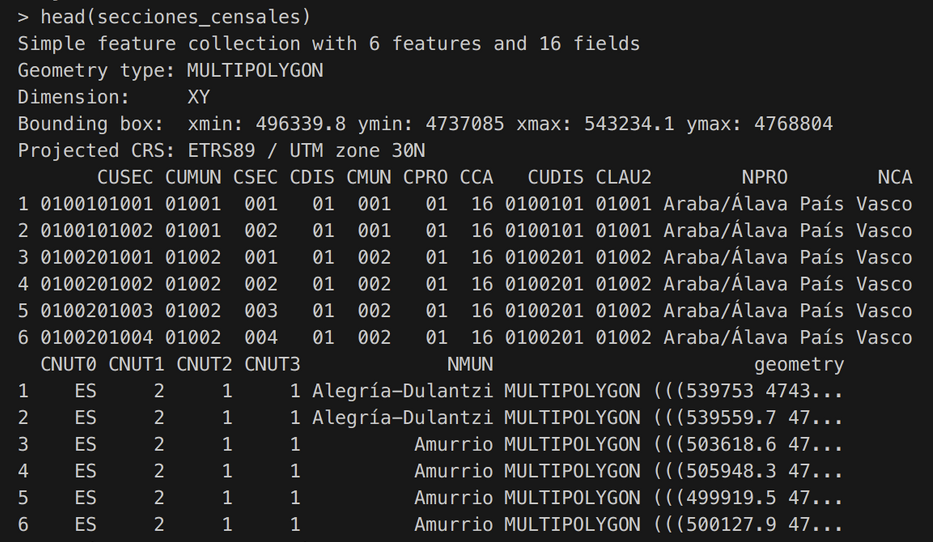
- Code of the province with 2 digits (e.g., province "8" should be province "08" instead).
- Code of the municipality should have 3 digits. Note that, in the data above, we have the code of the province + the code of the municipality together.
- Code of the district ("districte") with 2 digits (i.e., district "1" should be district "01").
- Code of the *sección censal* with 3 digits (i.e., *sección* "1" should be "001" instead, and *sección* "34" should be "034" instead).

Then, for handling the data better the best would be to join the codes and make a single code that uniquely identifies a province, municipality, district and *sección censal* (`CUSEC` in the image above). 

In [ ]:
df_gen_final = pd.read_csv('data/1_election_outcomes/catalunya_results/general/cat_general_preprocessed.csv', 
                           dtype = {'CUSEC': str})
df_reg_final = pd.read_csv('data/1_election_outcomes/catalunya_results/regional/cat_regional_preprocessed.csv',
                           dtype = {'CUSEC': str})

In [83]:
for df in [df_reg_votes, df_gen_votes, df_reg_turnout, df_gen_turnout]:
    # Fixing the province + municipality code. Match strings of 4 digits and add a 0 in those cases
    df['municipality_code_fixed'] = df['Codi Municipi'].astype(str).str.replace(r'^(\d{4})$', r'0\1', regex=True)
    # Fixing the district code: should be 2 digits for all district codes
    df['district_code_fixed'] = df['Districte'].astype(str).str.replace(r'^(\d{1})$', r'0\1', regex=True)
    # Fixing the "sección censal" code: should be 3 digits for all codes of "secciones"
    df['seccion_code_fixed'] = (
        df['Secció']
        .astype(str)
        .str.strip()          # Remove leading/trailing whitespace
        .str.split('\.').str[0]  # Handle decimal points (if present, e.g., "85.0" → "85")
        .str.zfill(3)          # Pad with leading zeros to ensure 3 digits
    )
    # Join all of the codes to match INE's format
    df['CUSEC'] = df['municipality_code_fixed'] + df['district_code_fixed'] + df['seccion_code_fixed']

<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_21182/3280262805.py:11: SyntaxWarning: invalid escape sequence '\.'
  .str.split('\.').str[0]  # Handle decimal points (if present, e.g., "85.0" → "85")


In [84]:
df_reg_votes.head()

,﻿Codi Província,Nom Província,Codi Municipi,Nom Municipi,Districte,Secció,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,municipality_code_fixed,district_code_fixed,seccion_code_fixed,CUSEC
0,25,Lleida,25001,Abella de la Conca,1,1,CiU,Convergència i Unió ...,56,1999,1,25001,01,001,2500101001
1,25,Lleida,25001,Abella de la Conca,1,1,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,25001,01,001,2500101001
2,25,Lleida,25001,Abella de la Conca,1,1,PP,Partit Popular,6,1999,1,25001,01,001,2500101001
3,25,Lleida,25001,Abella de la Conca,1,1,ERC,Esquerra Republicana de Catalunya,6,1999,1,25001,01,001,2500101001
4,25,Lleida,25001,Abella de la Conca,1,1,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,25001,01,001,2500101001


In [85]:
# Now, we drop all of the unnecessary columns from the data frames again
for df in [df_reg_votes, df_gen_votes, df_reg_turnout, df_gen_turnout]:
    df.drop(columns = [df.columns.to_list()[0], 'Codi Municipi',  # Note that the column "Codi Província" is not written exactly like expected, which returns an error
                           'Districte', 'Secció', 'municipality_code_fixed',
                           'district_code_fixed', 'seccion_code_fixed'], inplace = True)
    
for df in [df_reg_turnout, df_gen_turnout]:
    df.drop(columns = ['Població'], inplace = True)

df_reg_turnout.drop(columns = ['Participació 13:00', 'Participació 18:00'], inplace = True)

df_gen_turnout.drop(columns = ['Participació 14:00', 'Participació 18:00',
                               'Participació 2:00:00 PM', 'Participació 6:00:00 PM'], inplace = True)

Note that the final turnout of an election is saved in the `turnout` data frames as the turnout at 8 PM (when the polling stations close). The rest of the participation just denotes the participation at different times. 

## Integrating turnout data of general elections

In [86]:
df_reg_turnout

,Nom Província,Nom Municipi,Cens,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,CUSEC
0,Lleida,Abella de la Conca,142,83,59,0,0,83,83,1999,1,2500101001
1,Barcelona,Abrera,1081,745,336,1,8,736,744,1999,1,0800101001
2,Barcelona,Abrera,1909,1089,820,2,4,1083,1087,1999,1,0800101002
3,Barcelona,Abrera,418,220,198,0,1,219,220,1999,1,0800101003
4,Barcelona,Abrera,650,365,285,0,3,362,365,1999,1,0800101004
...,...,...,...,...,...,...,...,...,...,...,...,...
46078,Tarragona,"Canonja, la",1171,643,528,6,15,622,637,2024,1,4390701001
46079,Tarragona,"Canonja, la",1140,608,532,4,4,600,604,2024,1,4390701002
46080,Tarragona,"Canonja, la",961,550,411,5,8,537,545,2024,1,4390701003
46081,Tarragona,"Canonja, la",1177,573,604,4,9,560,569,2024,1,4390701004


In [87]:
df_gen_turnout

,Nom Província,Nom Municipi,Cens,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,Participació 8:00:00 PM,CUSEC
0,Lleida,Abella de la Conca,128,71.0,57,0,1,70,71,1996,1,NaN,2500101001
1,Barcelona,Abrera,2200,1757.0,443,2,7,1748,1755,1996,1,NaN,0800101001
2,Barcelona,Abrera,1697,1331.0,366,4,8,1319,1327,1996,1,NaN,0800101002
3,Barcelona,Abrera,827,596.0,231,1,3,592,595,1996,1,NaN,0800101003
4,Barcelona,Abrera,537,407.0,130,0,1,406,407,1996,1,NaN,0800101004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51243,Tarragona,Xerta,919,NaN,333,12,5,569,574,2023,1,586.0,4305201001
51244,Barcelona,Residents Absents Barcelona,217682,NaN,196248,258,194,20982,21176,2023,1,21434.0,0899801001
51245,Girona,Residents Absents Girona,24016,NaN,21681,52,16,2267,2283,2023,1,2335.0,1799801001
51246,Lleida,Residents Absents Lleida,18277,NaN,16519,33,15,1710,1725,2023,1,1758.0,2599801001


Note that in the data frame for the general elections, the turnout is split in 2 columns (there are name inconsistencies in the original files of electoral results). Therefore, first we must integrate the columns.

In [88]:
# Ensure both columns are float type to avoid issues
df_gen_turnout["Participació 20:00"] = df_gen_turnout["Participació 20:00"].astype(float)
df_gen_turnout["Participació 8:00:00 PM"] = df_gen_turnout["Participació 8:00:00 PM"].astype(float)

# Merge the two columns, keeping the non-null value
df_gen_turnout["Participació 20:00"] = df_gen_turnout["Participació 20:00"].fillna(df_gen_turnout["Participació 8:00:00 PM"])

# Drop the redundant column
df_gen_turnout = df_gen_turnout.drop(columns=["Participació 8:00:00 PM"])

# Convert again to integer
df_gen_turnout["Participació 20:00"] = df_gen_turnout["Participació 20:00"].astype(int)

df_gen_turnout.head()

,Nom Província,Nom Municipi,Cens,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,CUSEC
0,Lleida,Abella de la Conca,128,71,57,0,1,70,71,1996,1,2500101001
1,Barcelona,Abrera,2200,1757,443,2,7,1748,1755,1996,1,0800101001
2,Barcelona,Abrera,1697,1331,366,4,8,1319,1327,1996,1,0800101002
3,Barcelona,Abrera,827,596,231,1,3,592,595,1996,1,0800101003
4,Barcelona,Abrera,537,407,130,0,1,406,407,1996,1,0800101004


## Creating the turnout rate and the blank ballot rate

We will create two different indicators:
- The **turnout rate**, created from the number of people that participated in the election (including blank ballots) - `Participació 20:00` over the people with the right to vote in a certain *sección censal* for a specific municipality and year of election (`Cens`).
- The **blank ballot rate**, computed as the people that voted with blank ballots over all of the people that participated in the election for a certain *sección censal* and year.

First, note that the people in the column `Cens` is the number of people in a certain territory with the right to vote, as the numbers are significantly lower than the total population in Catalunya (which has had approx. 7.5 million people from 1999 to 2024).

In [89]:
df_reg_turnout.groupby('year_election')['Cens'].sum()

year_election
1999    5293657
2003    5307837
2006    5321274
2010    5363688
2012    5413868
2015    5510853
2017    5554455
2021    5624067
2024    5754952
Name: Cens, dtype: int64

In [90]:
for df in [df_reg_turnout, df_gen_turnout]:
    # 1. Create turnout rate
    df['turnout_rate'] = df['Participació 20:00'] / df['Cens']  
    # 2. Create blank ballot rate
    df['blank_ballot_rate'] = df['Vots en blanc'] / df['Participació 20:00']

In [91]:
df_reg_turnout.head()

,Nom Província,Nom Municipi,Cens,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,CUSEC,turnout_rate,blank_ballot_rate
0,Lleida,Abella de la Conca,142,83,59,0,0,83,83,1999,1,2500101001,0.584507,0.000000
1,Barcelona,Abrera,1081,745,336,1,8,736,744,1999,1,0800101001,0.689177,0.010738
2,Barcelona,Abrera,1909,1089,820,2,4,1083,1087,1999,1,0800101002,0.570456,0.003673
3,Barcelona,Abrera,418,220,198,0,1,219,220,1999,1,0800101003,0.526316,0.004545
4,Barcelona,Abrera,650,365,285,0,3,362,365,1999,1,0800101004,0.561538,0.008219


In [92]:
df_gen_turnout.head()

,Nom Província,Nom Municipi,Cens,Participació 20:00,Abstenció,Vots nuls,Vots en blanc,Vots a candidatures,Vots vàlids,year_election,election_number,CUSEC,turnout_rate,blank_ballot_rate
0,Lleida,Abella de la Conca,128,71,57,0,1,70,71,1996,1,2500101001,0.554688,0.014085
1,Barcelona,Abrera,2200,1757,443,2,7,1748,1755,1996,1,0800101001,0.798636,0.003984
2,Barcelona,Abrera,1697,1331,366,4,8,1319,1327,1996,1,0800101002,0.784325,0.006011
3,Barcelona,Abrera,827,596,231,1,3,592,595,1996,1,0800101003,0.720677,0.005034
4,Barcelona,Abrera,537,407,130,0,1,406,407,1996,1,0800101004,0.757914,0.002457


In [93]:
# Rename and order the columns for clarity (old: new)
rename_map = {
    'Nom Província': 'province_name',
    'Nom Municipi': 'municipality_name',
    'Cens': 'census',
    'Participació 20:00': 'turnout',
    'Abstenció': 'abstention',
    'Vots nuls': 'null_votes',
    'Vots en blanc': 'blank_ballots',
    'Vots a candidatures': 'votes_parties',
    'Vots vàlids': 'valid_votes'
}

for df in [df_reg_turnout, df_gen_turnout]:
    df.rename(columns = rename_map, inplace = True)

In [94]:
df_reg_turnout

,province_name,municipality_name,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,year_election,election_number,CUSEC,turnout_rate,blank_ballot_rate
0,Lleida,Abella de la Conca,142,83,59,0,0,83,83,1999,1,2500101001,0.584507,0.000000
1,Barcelona,Abrera,1081,745,336,1,8,736,744,1999,1,0800101001,0.689177,0.010738
2,Barcelona,Abrera,1909,1089,820,2,4,1083,1087,1999,1,0800101002,0.570456,0.003673
3,Barcelona,Abrera,418,220,198,0,1,219,220,1999,1,0800101003,0.526316,0.004545
4,Barcelona,Abrera,650,365,285,0,3,362,365,1999,1,0800101004,0.561538,0.008219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46078,Tarragona,"Canonja, la",1171,643,528,6,15,622,637,2024,1,4390701001,0.549103,0.023328
46079,Tarragona,"Canonja, la",1140,608,532,4,4,600,604,2024,1,4390701002,0.533333,0.006579
46080,Tarragona,"Canonja, la",961,550,411,5,8,537,545,2024,1,4390701003,0.572320,0.014545
46081,Tarragona,"Canonja, la",1177,573,604,4,9,560,569,2024,1,4390701004,0.486831,0.015707


One thing to note here: the last row indicates the population resident in the province of Tarragona but absent at the time of election, that voted (CERA). We will probably have one of these situations for each province in Catalunya. Therefore, we will not be able to geolocate the votes corresponding to these groups in a map. These observations should not have any polygon associated to it in the INE data, however, so we can discard them at that stage.

## Vote proportion per location and year

We construct this measure to get a comparable unit between years and locations, as different *secciones censales* have a different number of people with the right to vote, also across time.

In [95]:
for df in [df_gen_votes, df_reg_votes]:

    # Aggregate total votes per location, year and election number of that year
    df["total_votes_per_location_year"] = df.groupby(["year_election", "election_number", "CUSEC"])["Vots"].transform("sum")

    # Compute vote proportion for each party in that year
    df["vote_proportion_location_year"] = df["Vots"] / df["total_votes_per_location_year"]

In [96]:
df_gen_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,35,1996,1,2500101001,70,0.500000
1,Lleida,Abella de la Conca,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1,2500101001,70,0.257143
2,Lleida,Abella de la Conca,PP,Partit Popular,10,1996,1,2500101001,70,0.142857
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,5,1996,1,2500101001,70,0.071429
4,Lleida,Abella de la Conca,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1,2500101001,70,0.028571


e.g., 50% of the population in the territory coded as "2500101001", within the municipality "Abella de la Conca", voted the political party CiU in the 1996 general elections.

In [97]:
df_reg_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,56,1999,1,2500101001,83,0.674699
1,Lleida,Abella de la Conca,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,2500101001,83,0.144578
2,Lleida,Abella de la Conca,PP,Partit Popular,6,1999,1,2500101001,83,0.072289
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,6,1999,1,2500101001,83,0.072289
4,Lleida,Abella de la Conca,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,2500101001,83,0.024096


## Creating left-right index of political parties

### General elections

In [98]:
df_gen_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,35,1996,1,2500101001,70,0.500000
1,Lleida,Abella de la Conca,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1,2500101001,70,0.257143
2,Lleida,Abella de la Conca,PP,Partit Popular,10,1996,1,2500101001,70,0.142857
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,5,1996,1,2500101001,70,0.071429
4,Lleida,Abella de la Conca,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1,2500101001,70,0.028571


Below, we create a data frame with the unique political parties for each year, the total number of votes for that political party in a certain year, and the proportion of votes to that party in that year (as the total number of votes to that political party divided by the overall number of votes for a certain election).

In [99]:
# Aggregate total votes per party per year and number of election
df_agg_gen = df_gen_votes.groupby(["year_election", "election_number", "Sigles Candidatura","Nom Candidatura"], as_index=False)["Vots"].sum()

# Rename columns for clarity
df_agg_gen = df_agg_gen.rename(columns={"Vots": "total_votes_party"})

# Compute total votes per year and election number
total_votes_per_year = df_agg_gen.groupby(["year_election", 'election_number'])["total_votes_party"].sum().reset_index()
total_votes_per_year = total_votes_per_year.rename(columns={"total_votes_party": "total_votes_year"})

# Merge total votes per year into the aggregated DataFrame
df_agg_gen = df_agg_gen.merge(total_votes_per_year, on=["year_election", "election_number"])

# Compute vote proportion for each party
df_agg_gen["vote_proportion"] = df_agg_gen["total_votes_party"] / df_agg_gen["total_votes_year"]

df_agg_gen

,year_election,election_number,Sigles Candidatura,Nom Candidatura,total_votes_party,total_votes_year,vote_proportion
0,1996,1,CR,Coalició Republicana ...,655,3863772,0.000170
1,1996,1,CiU,Convergència i Unió ...,1151633,3863772,0.298059
2,1996,1,ERC,Esquerra Republicana de Catalunya,162545,3863772,0.042069
3,1996,1,EVE-AEC,Els Verds Europeus-Alternativa Ecologista de C...,7828,3863772,0.002026
4,1996,1,F.E.A.,Falange Española Auténtica ...,1633,3863772,0.000423
...,...,...,...,...,...,...,...
181,2023,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),1221335,3513762,0.347586
182,2023,1,RECORTES CERO,Recortes Cero,3739,3513762,0.001064
183,2023,1,SUMAR - ECP,Sumar - En Comú Podem,497617,3513762,0.141619
184,2023,1,UNIDOS SI,Unidos por la Solidaridad Internacional,253,3513762,0.000072


In [100]:
# Number of unique political parties for the general elections from 1996-2023
print(df_agg_gen['Sigles Candidatura'].nunique())

99


From 1996-2023, there have been 99 participating political parties in Catalunya. It is virtually impossible (for the time constraint that we have) to construct a good left-right index for each and every political party that has participated in the elections. For that reason, we can create a threshold: we will create an index only for those parties with equal or more than 0.5% of the total votes per election.

In [101]:
df_agg_gen_relevant_parties = df_agg_gen[df_agg_gen['vote_proportion'] >= 0.005]

print(df_agg_gen_relevant_parties['Sigles Candidatura'].nunique())

32


We have reduced the total number of parties from 99 to 32, which is a significant decrease while keeping most of the information!

In [102]:
# Select unique party acronyms and names
unique_parties_gen = df_agg_gen_relevant_parties[['Sigles Candidatura', 'Nom Candidatura']].drop_duplicates()

# Print each unique party acronym and name together
for index, row in unique_parties_gen.iterrows():
    print(f"{row['Sigles Candidatura']}: {row['Nom Candidatura']}")

CiU        : Convergència i Unió                               
ERC: Esquerra Republicana de Catalunya
IC-EV      : Iniciativa per Catalunya-Els Verds                
PP: Partit Popular
PSC: Partit dels Socialistes de Catalunya (PSC-PSOE)
EUiA       : Esquerra Unida i Alternativa                      
IC-V       : Iniciativa per Catalunya-Verds                    
EV-AE      : Els Verds-l'Alternativa Ecologista                
ICV-EUiA   : Iniciativa per Catalunya Verds - EUIA             
Cs: Ciutadans-Partido de la Ciudadanía
EB: Escons en Blanc
ERC-Ri.CAT: Esquerra Republicana de Catalunya-Catalunya Sí
ICV-EUiA-EP: Iniciativa per Catalunya-EUiA: L'Esquerra Plural
PACMA: Partit Antitaurí Contra el Maltractament Animal
PIRATA.CAT: Pirates de Catalunya
PxC: Plataforma per Catalunya
UPyD: Unión, Progreso y Democracia
DL: Democràcia i Llibertat. Convergència.Demòcrates.Reagrupament
EN COMÚ: En Comú Podem
ERC-Cat Sí: Esquerra Republicana de Catalunya-Catalunya Sí
PACMA: Partit Animalista 

In [103]:
df_agg_gen_relevant_parties.head()

,year_election,election_number,Sigles Candidatura,Nom Candidatura,total_votes_party,total_votes_year,vote_proportion
1,1996,1,CiU,Convergència i Unió ...,1151633,3863772,0.298059
2,1996,1,ERC,Esquerra Republicana de Catalunya,162545,3863772,0.042069
5,1996,1,IC-EV,Iniciativa per Catalunya-Els Verds ...,296985,3863772,0.076864
12,1996,1,PP,Partit Popular,698400,3863772,0.180756
13,1996,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),1531143,3863772,0.396282


To simplify, we create a left-right political index from our knowledge (crossed with external resources when we don't have enough information about a party) which ranges from -3 (extreme left) to 3 (extreme right), with 0 being the center. The index is created just on the basis of how progressive the policies of a certain party are, ignoring whether a party is pro-independence or not.

In [104]:
political_index_gen = {
    'CiU': 1, 'ERC': -2, 'IC-EV': -2, 'PP': 2, 'PSC': -1, 'EUiA': -2, 'IC-V': -2,
    'EV-AE': -2, 'ICV-EUiA': -2, 'Cs': 2, 'EB': 0, 'ERC-Ri.CAT': -2, 'ICV-EUiA-EP': -2,
    'PACMA': -2, 'PIRATA.CAT': -3, 'PxC': 3, 'UPyD': 0, 'DL': 1, 'EN COMÚ': -2,
    'ERC-Cat Sí': -2, 'unio.cat': 2, 'CDC': 1, 'ECP': -2, 'CUP-PR': -3, 
    'ECP-GUANYEM EL CANVI': -2, 'ERC-SOBIRANISTES': -2, 'FRONT REPUBLICÀ': -3,
    'JxCAT-JUNTS': 1, 'MÁS PAÍS': -2, 'VOX': 3, 'PDeCAT-E-CiU': 1, 'SUMAR - ECP': -2
}

# We can ensure that all of the parties are mapped correctly by checking that
# each of the parties in the aggregated data frame has a mapped value
df_agg_gen_relevant_parties['party_index'] = df_agg_gen_relevant_parties['Sigles Candidatura'].str.strip().map(political_index_gen)

df_agg_gen_relevant_parties.head()

/tmp/ipykernel_21182/2215648370.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_gen_relevant_parties['party_index'] = df_agg_gen_relevant_parties['Sigles Candidatura'].str.strip().map(political_index_gen)


,year_election,election_number,Sigles Candidatura,Nom Candidatura,total_votes_party,total_votes_year,vote_proportion,party_index
1,1996,1,CiU,Convergència i Unió ...,1151633,3863772,0.298059,1
2,1996,1,ERC,Esquerra Republicana de Catalunya,162545,3863772,0.042069,-2
5,1996,1,IC-EV,Iniciativa per Catalunya-Els Verds ...,296985,3863772,0.076864,-2
12,1996,1,PP,Partit Popular,698400,3863772,0.180756,2
13,1996,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),1531143,3863772,0.396282,-1


In [105]:
df_agg_gen_relevant_parties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 185
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year_election       76 non-null     object 
 1   election_number     76 non-null     object 
 2   Sigles Candidatura  76 non-null     object 
 3   Nom Candidatura     76 non-null     object 
 4   total_votes_party   76 non-null     int64  
 5   total_votes_year    76 non-null     int64  
 6   vote_proportion     76 non-null     float64
 7   party_index         76 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.3+ KB


There are no missing values, which means that the mapping has worked perfectly for the considered political parties! The rest of the political parties will have missing values.

In [106]:
# Now, map the indexes into the detailed general elections votes data frame
df_gen_votes['party_index'] = df_gen_votes['Sigles Candidatura'].str.strip().map(political_index_gen)

df_gen_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year,party_index
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,35,1996,1,2500101001,70,0.500000,1.0
1,Lleida,Abella de la Conca,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1,2500101001,70,0.257143,-1.0
2,Lleida,Abella de la Conca,PP,Partit Popular,10,1996,1,2500101001,70,0.142857,2.0
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,5,1996,1,2500101001,70,0.071429,-2.0
4,Lleida,Abella de la Conca,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1,2500101001,70,0.028571,-2.0


There will be several missing values in the index, but these will correspond to relatively unimportant parties (those with less than 0.5% of the votes in each election).

### Regional elections

The idea is the same as for the general elections (See above for a detailed explanation on the procedure).

In [107]:
df_reg_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,56,1999,1,2500101001,83,0.674699
1,Lleida,Abella de la Conca,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,2500101001,83,0.144578
2,Lleida,Abella de la Conca,PP,Partit Popular,6,1999,1,2500101001,83,0.072289
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,6,1999,1,2500101001,83,0.072289
4,Lleida,Abella de la Conca,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,2500101001,83,0.024096


Below, we create a data frame with the unique political parties for each year, the total number of votes for that political party in a certain year, and the proportion of votes to that party in that year (as the total number of votes to that political party divided by the overall number of votes for a certain election).

In [108]:
# Aggregate total votes per party per year and election number
df_agg_reg = df_reg_votes.groupby(["year_election", "election_number", "Sigles Candidatura","Nom Candidatura"], as_index=False)["Vots"].sum()

# Rename columns for clarity
df_agg_reg = df_agg_reg.rename(columns={"Vots": "total_votes_party"})

# Compute total votes per year
total_votes_per_year = df_agg_reg.groupby(["year_election", "election_number"])["total_votes_party"].sum().reset_index()
total_votes_per_year = total_votes_per_year.rename(columns={"total_votes_party": "total_votes_year"})

# Merge total votes per year into the aggregated DataFrame
df_agg_reg = df_agg_reg.merge(total_votes_per_year, on=["year_election", "election_number"])

# Compute vote proportion for each party
df_agg_reg["vote_proportion"] = df_agg_reg["total_votes_party"] / df_agg_reg["total_votes_year"]

df_agg_reg

,year_election,election_number,Sigles Candidatura,Nom Candidatura,total_votes_party,total_votes_year,vote_proportion
0,1999,1,CAM,Catalans al Món ...,110,3097122,0.000036
1,1999,1,CiU,Convergència i Unió ...,1178420,3097122,0.380489
2,1999,1,E.CAT,Estat Català ...,1774,3097122,0.000573
3,1999,1,ERC,Esquerra Republicana de Catalunya,271173,3097122,0.087556
4,1999,1,EUiA,Esquerra Unida i Alternativa ...,44454,3097122,0.014353
...,...,...,...,...,...,...,...
182,2024,1,PP,Partit Popular,347170,3120503,0.111254
183,2024,1,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),882589,3120503,0.282835
184,2024,1,PUM+J,Per Un Món Més Just,2760,3120503,0.000884
185,2024,1,RECORTES CERO,Recortes Cero,3487,3120503,0.001117


In [109]:
# Number of unique political parties for the regional elections from 1999-2024
print(df_agg_reg['Sigles Candidatura'].nunique())

117


From 1999-2024, there have been 117 participating political parties in Catalunya. It is virtually impossible (for the time constraint that we have) to construct a good left-right index for each and every political party that has participated in the elections. For that reason, we can create a threshold: we will create an index only for those parties with equal or more than 0.5% of the total votes per election.

In [110]:
df_agg_reg_relevant_parties = df_agg_reg[df_agg_reg['vote_proportion'] >= 0.005]

print(df_agg_reg_relevant_parties['Sigles Candidatura'].nunique())

39


We have reduced the total number of parties from 117 to 39, which is a significant decrease while keeping most of the information!

In [111]:
# Select unique party acronyms and names
unique_parties_reg = df_agg_reg_relevant_parties[['Sigles Candidatura', 'Nom Candidatura']].drop_duplicates()

# Print each unique party acronym and name together
for index, row in unique_parties_reg.iterrows():
    print(f"{row['Sigles Candidatura']}: {row['Nom Candidatura']}")

CiU        : Convergència i Unió                               
ERC: Esquerra Republicana de Catalunya
EUiA       : Esquerra Unida i Alternativa                      
EV-CEC     : Els Verds-Confederació Ecologista de Catalunya    
IC-V       : Iniciativa per Catalunya-Verds                    
PP: Partit Popular
PSC-CC-IC-V: PSC-Ciutadans pel Canvi-IC-Verds                  
PSC-CpC    : PSC-Ciutadans pel Canvi                           
EV-AE      : Els Verds-l'Alternativa Ecologista                
ICV-EA     : Iniciativa per Catalunya-Esquerra Alternativa     
Cs: Ciutadans-Partido de la Ciudadanía
EV-EVC     : Els Verds - Ecologistes i Verds de Catalunya      
ICV-EUiA   : Iniciativa per Catalunya Verds - EUIA             
EV-GVE      : Els Verds - Grup Verd Europeu                     
Eb-CenB: Escons en blanc-Ciudadanos en Blanco
PSC: Partit dels Socialistes de Catalunya (PSC-PSOE)
PxC: Plataforma per Catalunya
RI.cat: Reagrupament Independentista
SI: Solidaritat Catalana per la 

To simplify, we create a left-right political index from our knowledge (crossed with external resources when we don't have enough information about a party) which ranges from -3 (extreme left) to 3 (extreme right), with 0 being the center. The index is created just on the basis of how progressive the policies of a certain party are, ignoring whether a party is pro-independence or not.

In [112]:
# Create the political index for regional elections while carefully keeping the 
# same index for (virtually) the same parties 
political_index_reg = {
    'CiU': 1, 'ERC': -2, 'EUiA': -2, 'EV-CEC': -2, 'IC-V': -2, 'PP': 2,
    'PSC-CC-IC-V': -1, 'PSC-CpC': -1, 'EV-AE': -2, 'ICV-EA': -2, 'Cs': 2,
    'EV-EVC': -2, 'ICV-EUiA': -2, 'EV-GVE': -2, 'Eb-CenB': 0, 'PSC': -1,
    'PxC': 3, 'RI.cat': -1, 'SI': -1, 'CUP-Alt.Esq.': -3, 'EB': 0,
    'ERC-Cat Sí': -2, 'PACMA': -2, 'PIRATA.CAT': -3, 'CUP': -3, 'CatSíqueesPot': -2,
    'JxSí': 0, 'unio.cat': 2, 'CatComú-Podem': -2, 'JUNTSxCAT': 1, 'CUP-G': -3,
    'ECP-PEC': -2, 'JxCat': 1, 'PDeCAT': 1, 'VOX': 3, 'ALIANÇA.CAT': 3,
    'CAT-JUNTS+': 1, 'COMUNS SUMAR': -2, 'CUP - DT': -3
}

# We can ensure that all of the parties are mapped correctly by checking that
# each of the parties in the aggregated data frame has a mapped value
df_agg_reg_relevant_parties['party_index'] = df_agg_reg_relevant_parties['Sigles Candidatura'].str.strip().map(political_index_reg)

df_agg_reg_relevant_parties.head()

/tmp/ipykernel_21182/702518575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_reg_relevant_parties['party_index'] = df_agg_reg_relevant_parties['Sigles Candidatura'].str.strip().map(political_index_reg)


,year_election,election_number,Sigles Candidatura,Nom Candidatura,total_votes_party,total_votes_year,vote_proportion,party_index
1,1999,1,CiU,Convergència i Unió ...,1178420,3097122,0.380489,1
3,1999,1,ERC,Esquerra Republicana de Catalunya,271173,3097122,0.087556,-2
4,1999,1,EUiA,Esquerra Unida i Alternativa ...,44454,3097122,0.014353,-2
6,1999,1,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,22797,3097122,0.007361,-2
8,1999,1,IC-V,Iniciativa per Catalunya-Verds ...,78441,3097122,0.025327,-2


In [113]:
df_agg_reg_relevant_parties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 1 to 186
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year_election       79 non-null     object 
 1   election_number     79 non-null     object 
 2   Sigles Candidatura  79 non-null     object 
 3   Nom Candidatura     79 non-null     object 
 4   total_votes_party   79 non-null     int64  
 5   total_votes_year    79 non-null     int64  
 6   vote_proportion     79 non-null     float64
 7   party_index         79 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.6+ KB


In [114]:
# Now, map the indexes into the detailed general elections votes data frame
df_reg_votes['party_index'] = df_reg_votes['Sigles Candidatura'].str.strip().map(political_index_reg)

df_reg_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year,party_index
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,56,1999,1,2500101001,83,0.674699,1.0
1,Lleida,Abella de la Conca,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,2500101001,83,0.144578,-1.0
2,Lleida,Abella de la Conca,PP,Partit Popular,6,1999,1,2500101001,83,0.072289,2.0
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,6,1999,1,2500101001,83,0.072289,-2.0
4,Lleida,Abella de la Conca,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,2500101001,83,0.024096,-2.0


## Votes to incumbent government

The idea in this section is to create a column with the vote proportion per location and year to the incumbent government.
- General elections: see https://es.wikipedia.org/wiki/Anexo:Presidentes_del_Gobierno_de_Espa%C3%B1a. Incumbent government for each election (i.e., party in the government before that election): 
  - 1996: PSOE, 
  - 2000: PP, 
  - 2004: PP,
  - 2008: PSOE,
  - 2011: PSOE,
  - 2015: PP,
  - 2016: PP,
  - 2019: PP (but Sánchez won a vote of no confidence towards the PP government) - will consider as incumbent PP for both elections of 2019,
  - 2023: PSOE + UP.
- Regional elections (Catalunya): see https://ca.wikipedia.org/wiki/President_de_la_Generalitat_de_Catalunya#Llista_de_presidents_de_la_Generalitat_de_Catalunya, see also https://ca.wikipedia.org/wiki/Generalitat_de_Catalunya#Cronologia. Incumbent government parties for each election:
  - 1999: CiU + (CDC + UDC) (https://ca.wikipedia.org/wiki/Generalitat_de_Catalunya#Cronologia),
  - 2003: CiU + (CDC + UDC) (https://ca.wikipedia.org/wiki/Generalitat_de_Catalunya#Cronologia),
  - 2006: PSC-CpC + ERC + ICV-EUiA (https://ca.wikipedia.org/wiki/Setena_legislatura_de_la_Catalunya_auton%C3%B2mica#Govern),
  - 2010: PSC + ERC + ICV-EUiA (https://ca.wikipedia.org/wiki/Vuitena_legislatura_de_la_Catalunya_auton%C3%B2mica),
  - 2012: CiU (CDC + UDC) (https://ca.wikipedia.org/wiki/President_de_la_Generalitat_de_Catalunya#Llista_de_presidents_de_la_Generalitat_de_Catalunya),
  - 2015: CiU (CDC + UDC) (https://ca.wikipedia.org/wiki/Desena_legislatura_de_la_Catalunya_auton%C3%B2mica),
  - 2017: JxSí (https://ca.wikipedia.org/wiki/Onzena_legislatura_de_la_Catalunya_auton%C3%B2mica#Govern) - Convergència + ERC + Reagrupament + Catalunya Sí + Solidaritat Catalana (https://ca.wikipedia.org/wiki/Junts_pel_S%C3%AD),
  - 2021: JuntsxCat + ERC-Cat Sí + PDeCAT (https://ca.wikipedia.org/wiki/Joaquim_Torra_i_Pla),
  - 2024: ERC + JuntsxCat (https://ca.wikipedia.org/wiki/Catorzena_legislatura_del_Parlament_de_Catalunya#Govern_de_Catalunya_2021-2024)

The procedure below is a bit manual: first, check the political parties that presented in each election (though only one example has been kept as a reference), and then consider as incumbent those indicated above. If there was a coalition government, all of the participating political parties will be considered as incumbent.

*Note: problems with the incumbent parties.*
- Catalunya 2015 regional elections: CiU and ERC joined forces on the election. Also, that year Unió presented separately. So while CiU was the incumbent in that election, part of the party presented through "JuntsxSí", while the other part presented on their own.

In [115]:
print(df_reg_votes.loc[df_reg_votes['year_election'] == '2021', 'Sigles Candidatura'].unique())

['JxCat' 'ERC' 'CUP-G' 'PSC' 'ECP-PEC' 'Cs' 'PCTC' 'PP' 'MPIC' 'PUM+J'
 'PDeCAT' 'FNC' 'IZQP' 'EB' 'RECORTES CERO-GV-M' 'VOX' 'SCAT' 'PNC' 'UEP'
 'ALIANZA C V' 'M.C.R.' 'UNIDOS SI-DEf-PDSJE-SOMOS ESPAÑA'
 "SOM TERRES DE L'EBRE"]


In [116]:
# 1. For general elections

# Define the dictionary with integer keys
parties_to_sum_by_year_gen = {
    "1996": {"PSC"},
    "2000": {"PP"},
    "2004": {"PP"},
    "2008": {"PSC"},
    "2011": {"PSC"},
    "2015": {"PP"},
    "2016": {"PP"},
    "2019": {"PP"},
    "2023": {"PSC", "SUMAR - ECP"}
}

# Map each year to its incumbent parties, defaulting to an empty set
df_gen_votes['incumbent_parties'] = df_gen_votes['year_election'].map(
    lambda y: parties_to_sum_by_year_gen.get(y, set())
)

# Filter rows where the party is an incumbent for its year
mask = df_gen_votes.apply(
    lambda row: row['Sigles Candidatura'].strip() in row['incumbent_parties'],
    axis=1
)
df_filtered = df_gen_votes[mask]

# Sum the proportions by location, year and election number
df_incumbent_prop_gen = df_filtered.groupby(
    ['CUSEC', 'year_election', 'election_number'], as_index=False
)['vote_proportion_location_year'].sum().rename(
    columns={'vote_proportion_location_year': 'incumbent_vote_proportion'}
)

In [117]:
df_incumbent_prop_gen.head()

,CUSEC,year_election,election_number,incumbent_vote_proportion
0,0800101001,1996,1,0.455950
1,0800101001,2000,1,0.242667
2,0800101001,2004,1,0.126984
3,0800101001,2008,1,0.526818
4,0800101001,2011,1,0.351282


In [118]:
# 2. For regional elections

# Define the dictionary with integer keys
parties_to_sum_by_year_reg = {
    "1999": {"CiU"},
    "2003": {"CiU"},
    "2006": {"PSC-CpC", "ICV-EUiA", "ERC"},
    "2010": {"PSC", "ICV-EUiA", "ERC"},
    "2012": {"CiU"},
    "2015": {"JxSí", "unio.cat"},
    "2017": {"JUNTSxCAT", "ERC-Cat Sí"},
    "2021": {"JxCat", "ERC", "PDeCAT"},
    "2024": {"CAT-JUNTS+", "ERC"}
}

# Map each year to its incumbent parties, defaulting to an empty set
df_reg_votes['incumbent_parties'] = df_reg_votes['year_election'].map(
    lambda y: parties_to_sum_by_year_reg.get(y, set())
)

# Filter rows where the party is an incumbent for its year
mask = df_reg_votes.apply(
    lambda row: row['Sigles Candidatura'].strip() in row['incumbent_parties'],
    axis=1
)
df_filtered = df_reg_votes[mask]

# Sum the proportions by location, year and election number
df_incumbent_prop_reg = df_filtered.groupby(
    ['CUSEC', 'year_election', 'election_number'], as_index=False
)['vote_proportion_location_year'].sum().rename(
    columns={'vote_proportion_location_year': 'incumbent_vote_proportion'}
)

In [119]:
df_incumbent_prop_reg.head()

,CUSEC,year_election,election_number,incumbent_vote_proportion
0,0800101001,1999,1,0.319293
1,0800101001,2003,1,0.248691
2,0800101001,2006,1,0.600910
3,0800101001,2010,1,0.403458
4,0800101001,2012,1,0.214286


I have manually checked some results, and they seem to be right.

## Index of alignment to catalanist parties

Similarly to the procedure for creating the left-right index, we can create a simple binary variable that states whether a political party is catalanist (1) or not (0). For simplicity, this variable does not denote whether a party is pro-independence or not, since there have been some parties which were not initally explicitly pro-independence but that have been pro-independence later.

Below we check for all of the political parties considered in the regional and general elections, and tag them with 1 if they are catalanist and 0 otherwise. We also take the dictionary from the left-right index for general and regional elections as a reference. 

### General elections

In [122]:
# Print each unique party acronym and name together
for index, row in unique_parties_gen.iterrows():
    print(f"{row['Sigles Candidatura']}: {row['Nom Candidatura']}")

CiU        : Convergència i Unió                               
ERC: Esquerra Republicana de Catalunya
IC-EV      : Iniciativa per Catalunya-Els Verds                
PP: Partit Popular
PSC: Partit dels Socialistes de Catalunya (PSC-PSOE)
EUiA       : Esquerra Unida i Alternativa                      
IC-V       : Iniciativa per Catalunya-Verds                    
EV-AE      : Els Verds-l'Alternativa Ecologista                
ICV-EUiA   : Iniciativa per Catalunya Verds - EUIA             
Cs: Ciutadans-Partido de la Ciudadanía
EB: Escons en Blanc
ERC-Ri.CAT: Esquerra Republicana de Catalunya-Catalunya Sí
ICV-EUiA-EP: Iniciativa per Catalunya-EUiA: L'Esquerra Plural
PACMA: Partit Antitaurí Contra el Maltractament Animal
PIRATA.CAT: Pirates de Catalunya
PxC: Plataforma per Catalunya
UPyD: Unión, Progreso y Democracia
DL: Democràcia i Llibertat. Convergència.Demòcrates.Reagrupament
EN COMÚ: En Comú Podem
ERC-Cat Sí: Esquerra Republicana de Catalunya-Catalunya Sí
PACMA: Partit Animalista 

In [123]:
# 1. For general elections

# Define the dictionary with integer keys
catalanist_index_gen = {
    'CiU': 1, 'ERC': 1, 'IC-EV': 0, 'PP': 0, 'PSC': 0, 'EUiA': 0, 'IC-V': 0,
    'EV-AE': 0, 'ICV-EUiA': 0, 'Cs': 0, 'EB': 0, 'ERC-Ri.CAT': 1, 'ICV-EUiA-EP': 0,
    'PACMA': 0, 'PIRATA.CAT': 0, 'PxC': 0, 'UPyD': 0, 'DL': 1, 'EN COMÚ': 0,
    'ERC-Cat Sí': 1, 'unio.cat': 1, 'CDC': 1, 'ECP': 0, 'CUP-PR': 1, 
    'ECP-GUANYEM EL CANVI': 0, 'ERC-SOBIRANISTES': 1, 'FRONT REPUBLICÀ': 1,
    'JxCAT-JUNTS': 1, 'MÁS PAÍS': 0, 'VOX': 0, 'PDeCAT-E-CiU': 1, 'SUMAR - ECP': 0
}

# Now, map the indexes into the detailed general elections votes data frame
df_gen_votes['catalanist_index'] = df_gen_votes['Sigles Candidatura'].str.strip().map(catalanist_index_gen)

df_gen_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year,party_index,incumbent_parties,catalanist_index
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,35,1996,1,2500101001,70,0.500000,1.0,{PSC},1.0
1,Lleida,Abella de la Conca,PSC,Partit dels Socialistes de Catalunya (PSC-PSOE),18,1996,1,2500101001,70,0.257143,-1.0,{PSC},0.0
2,Lleida,Abella de la Conca,PP,Partit Popular,10,1996,1,2500101001,70,0.142857,2.0,{PSC},0.0
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,5,1996,1,2500101001,70,0.071429,-2.0,{PSC},1.0
4,Lleida,Abella de la Conca,IC-EV,Iniciativa per Catalunya-Els Verds ...,2,1996,1,2500101001,70,0.028571,-2.0,{PSC},0.0


### Regional elections

In [124]:
# Print each unique party acronym and name together
for index, row in unique_parties_reg.iterrows():
    print(f"{row['Sigles Candidatura']}: {row['Nom Candidatura']}")

CiU        : Convergència i Unió                               
ERC: Esquerra Republicana de Catalunya
EUiA       : Esquerra Unida i Alternativa                      
EV-CEC     : Els Verds-Confederació Ecologista de Catalunya    
IC-V       : Iniciativa per Catalunya-Verds                    
PP: Partit Popular
PSC-CC-IC-V: PSC-Ciutadans pel Canvi-IC-Verds                  
PSC-CpC    : PSC-Ciutadans pel Canvi                           
EV-AE      : Els Verds-l'Alternativa Ecologista                
ICV-EA     : Iniciativa per Catalunya-Esquerra Alternativa     
Cs: Ciutadans-Partido de la Ciudadanía
EV-EVC     : Els Verds - Ecologistes i Verds de Catalunya      
ICV-EUiA   : Iniciativa per Catalunya Verds - EUIA             
EV-GVE      : Els Verds - Grup Verd Europeu                     
Eb-CenB: Escons en blanc-Ciudadanos en Blanco
PSC: Partit dels Socialistes de Catalunya (PSC-PSOE)
PxC: Plataforma per Catalunya
RI.cat: Reagrupament Independentista
SI: Solidaritat Catalana per la 

In [125]:
# 2. For regional elections

# Define the dictionary with integer keys
catalanist_index_reg = {
    'CiU': 1, 'ERC': 0, 'EUiA': 0, 'EV-CEC': 0, 'IC-V': 0, 'PP': 0,
    'PSC-CC-IC-V': 0, 'PSC-CpC': 0, 'EV-AE': 0, 'ICV-EA': 0, 'Cs': 0,
    'EV-EVC': 0, 'ICV-EUiA': 0, 'EV-GVE': 0, 'Eb-CenB': 0, 'PSC': 0,
    'PxC': 0, 'RI.cat': 1, 'SI': 1, 'CUP-Alt.Esq.': 1, 'EB': 0,
    'ERC-Cat Sí': 1, 'PACMA': 0, 'PIRATA.CAT': 0, 'CUP': 1, 'CatSíqueesPot': 0,
    'JxSí': 1, 'unio.cat': 1, 'CatComú-Podem': 0, 'JUNTSxCAT': 1, 'CUP-G': 1,
    'ECP-PEC': 0, 'JxCat': 1, 'PDeCAT': 1, 'VOX': 0, 'ALIANÇA.CAT': 1,
    'CAT-JUNTS+': 1, 'COMUNS SUMAR': 0, 'CUP - DT': 1
}

# Now, map the indexes into the detailed general elections votes data frame
df_reg_votes['catalanist_index'] = df_reg_votes['Sigles Candidatura'].str.strip().map(catalanist_index_reg)

df_reg_votes.head()

,Nom Província,Nom Municipi,Sigles Candidatura,Nom Candidatura,Vots,year_election,election_number,CUSEC,total_votes_per_location_year,vote_proportion_location_year,party_index,incumbent_parties,catalanist_index
0,Lleida,Abella de la Conca,CiU,Convergència i Unió ...,56,1999,1,2500101001,83,0.674699,1.0,{CiU},1.0
1,Lleida,Abella de la Conca,PSC-CC-IC-V,PSC-Ciutadans pel Canvi-IC-Verds ...,12,1999,1,2500101001,83,0.144578,-1.0,{CiU},0.0
2,Lleida,Abella de la Conca,PP,Partit Popular,6,1999,1,2500101001,83,0.072289,2.0,{CiU},0.0
3,Lleida,Abella de la Conca,ERC,Esquerra Republicana de Catalunya,6,1999,1,2500101001,83,0.072289,-2.0,{CiU},0.0
4,Lleida,Abella de la Conca,EV-CEC,Els Verds-Confederació Ecologista de Catalunya...,2,1999,1,2500101001,83,0.024096,-2.0,{CiU},0.0


## Aggregating left-right index and catalanist index by *sección censal* and election year

In this section, we aggregate the ideology index by *sección censal*, election year and number of the election. 

In [126]:
# 1. General elections

# Step 1: Drop rows where 'party_index' is NaN (coincides with rows for catalanist index)
df_filtered = df_gen_votes.dropna(subset=['party_index'])

# Step 2: Compute the product of 'vote_proportion_location_year' and 'party_index', and also for catalanist index
df_filtered['political_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['party_index']
df_filtered['catalanist_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['catalanist_index']

# Step 3: Group by the specified columns and sum the product of both weighted indices
df_gen_political_index = df_filtered.groupby(
    ['CUSEC', 'year_election', 'election_number'], as_index=False
)[['political_index_weighted', 'catalanist_index_weighted']].sum().rename(
    columns={'political_index_weighted': 'political_index_agg', 
             'catalanist_index_weighted': 'catalanist_index_agg'}
)

# Display the result
df_gen_political_index.head()

/tmp/ipykernel_21182/60343701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['political_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['party_index']
/tmp/ipykernel_21182/60343701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['catalanist_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['catalanist_index']


,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg
0,0800101001,1996,1,-0.280892,0.229405
1,0800101001,2000,1,0.138667,0.277333
2,0800101001,2004,1,-0.518519,0.275132
3,0800101001,2008,1,-0.306317,0.210965
4,0800101001,2011,1,0.073077,0.265385


In [ ]:
# 2. Regional elections

# Step 1: Drop rows where 'party_index' is NaN (coincides with rows for catalanist index)
df_filtered = df_reg_votes.dropna(subset=['party_index'])

# Step 2: Compute the product of 'vote_proportion_location_year' and 'party_index', and also for catalanist index
df_filtered['political_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['party_index']
df_filtered['catalanist_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['catalanist_index']

# Step 3: Group by the specified columns and sum the product of both weighted indices
df_reg_political_index = df_filtered.groupby(
    ['CUSEC', 'year_election', 'election_number'], as_index=False
)[['political_index_weighted', 'catalanist_index_weighted']].sum().rename(
    columns={'political_index_weighted': 'political_index_agg', 
            'catalanist_index_weighted': 'catalanist_index_agg'}
)

# Display the result
df_reg_political_index.head()

/tmp/ipykernel_21182/703874711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['political_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['party_index']
/tmp/ipykernel_21182/703874711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['catalanist_index_weighted'] = df_filtered['vote_proportion_location_year'] * df_filtered['catalanist_index']


,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg
0,0800101001,1999,1,-0.236413,0.319293
1,0800101001,2003,1,-0.421466,0.248691
2,0800101001,2006,1,-0.424886,0.241275
3,0800101001,2010,1,0.162824,0.335735
4,0800101001,2012,1,-0.049261,0.348522


## Merging the data into a single data frame

We have 3 relevant data frames that must be merged for having everything in the same place (for regional and general elections, separately):
1. The data frames with the turnout rate and blank ballot rate.
2. The data frame with the vote proportion towards the incumbent government.
3. The data frame with the aggregated political index and the catalanist index.
 
For simplicity, first (2) and (3) can be merged together, as they have the same row identifiers and format.

In [128]:
# Merge the last 2 data frames, which have the same format
df_gen_vote_results = df_gen_political_index.merge(right = df_incumbent_prop_gen, how = 'left', on = ['CUSEC', 'year_election', 'election_number'])
df_reg_vote_results = df_reg_political_index.merge(right = df_incumbent_prop_reg, how = 'left', on = ['CUSEC', 'year_election', 'election_number'])

In [129]:
df_gen_vote_results.head()

,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg,incumbent_vote_proportion
0,0800101001,1996,1,-0.280892,0.229405,0.455950
1,0800101001,2000,1,0.138667,0.277333,0.242667
2,0800101001,2004,1,-0.518519,0.275132,0.126984
3,0800101001,2008,1,-0.306317,0.210965,0.526818
4,0800101001,2011,1,0.073077,0.265385,0.351282


In [130]:
df_reg_vote_results.head()

,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg,incumbent_vote_proportion
0,0800101001,1999,1,-0.236413,0.319293,0.319293
1,0800101001,2003,1,-0.421466,0.248691,0.248691
2,0800101001,2006,1,-0.424886,0.241275,0.600910
3,0800101001,2010,1,0.162824,0.335735,0.403458
4,0800101001,2012,1,-0.049261,0.348522,0.214286


In [ ]:
df_gen_turnout.head()

,province_name,municipality_name,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,year_election,election_number,CUSEC,turnout_rate,blank_ballot_rate
0,Lleida,Abella de la Conca,128,71,57,0,1,70,71,1996,1,2500101001,0.554688,0.014085
1,Barcelona,Abrera,2200,1757,443,2,7,1748,1755,1996,1,0800101001,0.798636,0.003984
2,Barcelona,Abrera,1697,1331,366,4,8,1319,1327,1996,1,0800101002,0.784325,0.006011
3,Barcelona,Abrera,827,596,231,1,3,592,595,1996,1,0800101003,0.720677,0.005034
4,Barcelona,Abrera,537,407,130,0,1,406,407,1996,1,0800101004,0.757914,0.002457


In [ ]:
df_reg_turnout.head()

,province_name,municipality_name,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,year_election,election_number,CUSEC,turnout_rate,blank_ballot_rate
0,Lleida,Abella de la Conca,142,83,59,0,0,83,83,1999,1,2500101001,0.584507,0.000000
1,Barcelona,Abrera,1081,745,336,1,8,736,744,1999,1,0800101001,0.689177,0.010738
2,Barcelona,Abrera,1909,1089,820,2,4,1083,1087,1999,1,0800101002,0.570456,0.003673
3,Barcelona,Abrera,418,220,198,0,1,219,220,1999,1,0800101003,0.526316,0.004545
4,Barcelona,Abrera,650,365,285,0,3,362,365,1999,1,0800101004,0.561538,0.008219


After checking that the number of rows and the number of unique `CUSEC` is the same in all 4 data frames, we can merge everything together!

In [131]:
df_gen_final = df_gen_vote_results.merge(right = df_gen_turnout, how = 'left', on = ['CUSEC', 'year_election', 'election_number'])
df_reg_final = df_reg_vote_results.merge(right = df_reg_turnout, how = 'left', on = ['CUSEC', 'year_election', 'election_number'])

In [132]:
df_gen_final.head()

,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg,incumbent_vote_proportion,province_name,municipality_name,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate
0,0800101001,1996,1,-0.280892,0.229405,0.455950,Barcelona,Abrera,2200,1757,443,2,7,1748,1755,0.798636,0.003984
1,0800101001,2000,1,0.138667,0.277333,0.242667,Barcelona,Abrera,1108,767,341,4,13,750,763,0.692238,0.016949
2,0800101001,2004,1,-0.518519,0.275132,0.126984,Barcelona,Abrera,1199,956,243,5,6,945,951,0.797331,0.006276
3,0800101001,2008,1,-0.306317,0.210965,0.526818,Barcelona,Abrera,1164,850,314,4,7,839,846,0.730241,0.008235
4,0800101001,2011,1,0.073077,0.265385,0.351282,Barcelona,Abrera,1168,809,359,15,14,780,794,0.692637,0.017305


In [133]:
df_reg_final.head()

,CUSEC,year_election,election_number,political_index_agg,catalanist_index_agg,incumbent_vote_proportion,province_name,municipality_name,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate
0,0800101001,1999,1,-0.236413,0.319293,0.319293,Barcelona,Abrera,1081,745,336,1,8,736,744,0.689177,0.010738
1,0800101001,2003,1,-0.421466,0.248691,0.248691,Barcelona,Abrera,1207,776,431,3,9,764,773,0.642916,0.011598
2,0800101001,2006,1,-0.424886,0.241275,0.600910,Barcelona,Abrera,1198,675,523,7,9,659,668,0.563439,0.013333
3,0800101001,2010,1,0.162824,0.335735,0.403458,Barcelona,Abrera,1174,721,453,8,19,694,713,0.614140,0.026352
4,0800101001,2012,1,-0.049261,0.348522,0.214286,Barcelona,Abrera,1147,837,310,9,16,812,828,0.729730,0.019116


# 4. Summary of the results and saving them to .csv

In [134]:
# First, we change the order of the columns to a clearer order (identifiers first,
# results later)
columns_ordered = ['CUSEC', 'province_name', 'municipality_name', 'year_election',
                   'election_number', 'census', 'turnout', 'abstention', 'null_votes',
                   'blank_ballots', 'votes_parties', 'valid_votes', 'turnout_rate',
                   'blank_ballot_rate', 'incumbent_vote_proportion', 'political_index_agg',
                   'catalanist_index_agg']
df_gen_final = df_gen_final[columns_ordered]
df_reg_final = df_reg_final[columns_ordered]

In [135]:
df_gen_final.head()

,CUSEC,province_name,municipality_name,year_election,election_number,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate,incumbent_vote_proportion,political_index_agg,catalanist_index_agg
0,0800101001,Barcelona,Abrera,1996,1,2200,1757,443,2,7,1748,1755,0.798636,0.003984,0.455950,-0.280892,0.229405
1,0800101001,Barcelona,Abrera,2000,1,1108,767,341,4,13,750,763,0.692238,0.016949,0.242667,0.138667,0.277333
2,0800101001,Barcelona,Abrera,2004,1,1199,956,243,5,6,945,951,0.797331,0.006276,0.126984,-0.518519,0.275132
3,0800101001,Barcelona,Abrera,2008,1,1164,850,314,4,7,839,846,0.730241,0.008235,0.526818,-0.306317,0.210965
4,0800101001,Barcelona,Abrera,2011,1,1168,809,359,15,14,780,794,0.692637,0.017305,0.351282,0.073077,0.265385


In [136]:
df_reg_final.head()

,CUSEC,province_name,municipality_name,year_election,election_number,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate,incumbent_vote_proportion,political_index_agg,catalanist_index_agg
0,0800101001,Barcelona,Abrera,1999,1,1081,745,336,1,8,736,744,0.689177,0.010738,0.319293,-0.236413,0.319293
1,0800101001,Barcelona,Abrera,2003,1,1207,776,431,3,9,764,773,0.642916,0.011598,0.248691,-0.421466,0.248691
2,0800101001,Barcelona,Abrera,2006,1,1198,675,523,7,9,659,668,0.563439,0.013333,0.600910,-0.424886,0.241275
3,0800101001,Barcelona,Abrera,2010,1,1174,721,453,8,19,694,713,0.614140,0.026352,0.403458,0.162824,0.335735
4,0800101001,Barcelona,Abrera,2012,1,1147,837,310,9,16,812,828,0.729730,0.019116,0.214286,-0.049261,0.348522


Each row for each of these data frames is a result for a certain `CUSEC`, `year_election` and `election_number`.

Explanation of the columns (variables):
- `CUSEC`: unique identifier for a province + municipality + district + *sección censal*.
- `province_name`, `municipality_name`: self-explanatory.
- `year_election`: year when the election took place.
- `election_number`: number of the election for each year (there has only been one year, 2019, when 2 elections took place in the same year).
- `census`: number of people with the right to vote.
- `turnout`: overall participation in the election.
- `abstention`: people with the right to vote who didn't vote (`census` - `turnout`).
- `null_votes`: number of invalid votes (e.g., two votes by the same person).
- `blank_ballots`: number of valid votes but for no party.
- `votes_parties`: number of votes to political parties.
- `valid_votes`: sum of the previous 2.
- `turnout_rate`: people who participated in the election divided by the `census`.
- `blank_ballot_rate`: people that voted with blank ballots over all of the people that participated in the election (i.e., `blank_ballots` / `turnout`).
- `incumbent_vote_proportion`: proportion of votes for a certain `CUSEC`, `year_election` and `election_number` to the incumbent party(ies).
- `political_index_agg`: political index for a certain `CUSEC`, `year_election` and `election_number`, with -3 being to the extreme left and 3 to the extreme right. Computed as the sum of the product of the proportion of votes to a party times the mapped political index of that party. 
- `catalanist_index_agg`: index computed as the proportion of votes for a certain `CUSEC`, `year_election` and `election_number` towards catalanist (and commonly pro-independence as well) parties. Computed in the same way as the political index, as the sum of the product of the proportion of votes to a party times the mapped political index of that party. Catalanist parties were tagged with 1 and non-catalanist parties with 0.

In [137]:
df_gen_final.to_csv('data/1_election_outcomes/catalunya_results/general/cat_general_preprocessed.csv', index = False)
df_reg_final.to_csv('data/1_election_outcomes/catalunya_results/regional/cat_regional_preprocessed.csv', index = False)

# 5. Exploration of results

## Catalunya

In [4]:
df_gen_final = pd.read_csv('data/1_election_outcomes/catalunya_results/general/cat_general_preprocessed.csv', 
                           dtype = {'CUSEC': str})
df_reg_final = pd.read_csv('data/1_election_outcomes/catalunya_results/regional/cat_regional_preprocessed.csv',
                           dtype = {'CUSEC': str})

Note that we have to be careful when reading the `CUSEC`! If not explicitly stated, the identification code will be read as an integer (so the preceding 0 of some codes will be removed), not as a string.

In [142]:
df_gen_final.head()

,CUSEC,province_name,municipality_name,year_election,election_number,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate,incumbent_vote_proportion,political_index_agg,catalanist_index_agg
0,0800101001,Barcelona,Abrera,1996,1,2200,1757,443,2,7,1748,1755,0.798636,0.003984,0.455950,-0.280892,0.229405
1,0800101001,Barcelona,Abrera,2000,1,1108,767,341,4,13,750,763,0.692238,0.016949,0.242667,0.138667,0.277333
2,0800101001,Barcelona,Abrera,2004,1,1199,956,243,5,6,945,951,0.797331,0.006276,0.126984,-0.518519,0.275132
3,0800101001,Barcelona,Abrera,2008,1,1164,850,314,4,7,839,846,0.730241,0.008235,0.526818,-0.306317,0.210965
4,0800101001,Barcelona,Abrera,2011,1,1168,809,359,15,14,780,794,0.692637,0.017305,0.351282,0.073077,0.265385


In [143]:
df_reg_final.head()

,CUSEC,province_name,municipality_name,year_election,election_number,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate,incumbent_vote_proportion,political_index_agg,catalanist_index_agg
0,0800101001,Barcelona,Abrera,1999,1,1081,745,336,1,8,736,744,0.689177,0.010738,0.319293,-0.236413,0.319293
1,0800101001,Barcelona,Abrera,2003,1,1207,776,431,3,9,764,773,0.642916,0.011598,0.248691,-0.421466,0.248691
2,0800101001,Barcelona,Abrera,2006,1,1198,675,523,7,9,659,668,0.563439,0.013333,0.600910,-0.424886,0.241275
3,0800101001,Barcelona,Abrera,2010,1,1174,721,453,8,19,694,713,0.614140,0.026352,0.403458,0.162824,0.335735
4,0800101001,Barcelona,Abrera,2012,1,1147,837,310,9,16,812,828,0.729730,0.019116,0.214286,-0.049261,0.348522


In [13]:
# Calculate the length of each string in 'column_name'
df_gen_final['length_CUSEC'] = df_gen_final['CUSEC'].str.len()

df_gen_final['length_CUSEC'].value_counts()

length_CUSEC
10    51248
Name: count, dtype: int64

In [ ]:
for year_election in df_gen_final['year_election'].unique():
    df = df_gen_final[df_gen_final['year_election'] == year_election]
    print(f"Year {year_election}: {df['CUSEC'].nunique()} unique locations")

Year 1996: 5089 unique locations
Year 2000: 5117 unique locations
Year 2004: 5241 unique locations
Year 2008: 5414 unique locations
Year 2011: 5025 unique locations
Year 2015: 5052 unique locations
Year 2016: 5050 unique locations
Year 2019: 5077 unique locations
Year 2023: 5119 unique locations


In [7]:
def identify_missing_municipalities(df):
    # Get all unique years and CUSECs
    all_years = sorted(df['year_election'].unique())
    all_cusecs = set(df['CUSEC'].unique())
    
    # Dictionary to store CUSECs present in each year
    cusecs_by_year = {}
    
    # Populate the dictionary
    for year in all_years:
        year_df = df[df['year_election'] == year]
        cusecs_by_year[year] = set(year_df['CUSEC'].unique())
        print(f"Year {year}: {len(cusecs_by_year[year])} unique locations")
    
    # Find missing CUSECs for each year
    print("\nMissing municipalities by year:")
    for year in all_years:
        missing_cusecs = all_cusecs - cusecs_by_year[year]
        if missing_cusecs:
            print(f"\nYear {year} is missing {len(missing_cusecs)} municipalities:")
            missing_data = df[df['CUSEC'].isin(missing_cusecs)].drop_duplicates(subset=['CUSEC', 'municipality_name'])
            for _, row in missing_data.iterrows():
                print(f"  CUSEC: {row['CUSEC']}, Municipality: {row['municipality_name']}")
    
    # Creating a detailed comparison table
    print("\nDetailed comparison of municipalities across years:")
    comparison_data = []
    
    for cusec in all_cusecs:
        # Get the municipality name from any year it appears
        municipality = df[df['CUSEC'] == cusec]['municipality_name'].iloc[0]
        
        # Check presence in each year
        presence = {year: cusec in cusecs_by_year[year] for year in all_years}
        
        # Only include if it's missing in at least one year
        if not all(presence.values()):
            comparison_data.append({
                'CUSEC': cusec,
                'Municipality': municipality,
                **{f'Present in {year}': presence[year] for year in all_years}
            })
    
    # Print the comparison data
    if comparison_data:
        for item in comparison_data:
            print(f"\nCUSEC: {item['CUSEC']}, Municipality: {item['Municipality']}")
            for year in all_years:
                status = "Present" if item[f'Present in {year}'] else "Missing"
                print(f"  {year}: {status}")
    
    # Summary table 1: Number of missing CUSECs per municipality
    print("\n=== Summary: Missing CUSECs per Municipality ===")
    municipality_missing_counts = {}
    
    for item in comparison_data:
        municipality = item['Municipality']
        if municipality not in municipality_missing_counts:
            municipality_missing_counts[municipality] = 0
        
        # Count years where this CUSEC is missing
        missing_years = sum(1 for year in all_years if not item[f'Present in {year}'])
        municipality_missing_counts[municipality] += 1
    
    # Print municipalities with at least one missing CUSEC
    if municipality_missing_counts:
        print(f"{'Municipality':<30} | {'Number of Inconsistent CUSECs':<30}")
        print("-" * 62)
        for municipality, count in sorted(municipality_missing_counts.items(), key=lambda x: x[1], reverse=True):
            print(f"{municipality:<30} | {count:<30}")
    
    # Summary table 2: Municipalities with inconsistent CUSECs
    print("\n=== Summary: Municipalities with Inconsistent CUSECs ===")
    total_municipalities = len(set(df['municipality_name']))
    affected_municipalities = len(municipality_missing_counts)
    
    print(f"Total municipalities in dataset: {total_municipalities}")
    print(f"Municipalities with at least one inconsistent CUSEC: {affected_municipalities} ({affected_municipalities/total_municipalities*100:.2f}%)")
    
    # Count municipalities by number of inconsistent CUSECs
    inconsistency_distribution = {}
    for municipality, count in municipality_missing_counts.items():
        if count not in inconsistency_distribution:
            inconsistency_distribution[count] = 0
        inconsistency_distribution[count] += 1
    
    print("\nDistribution of inconsistencies:")
    print(f"{'Number of Inconsistent CUSECs':<30} | {'Number of Municipalities':<30} | {'Percentage':<10}")
    print("-" * 74)
    for count, num_municipalities in sorted(inconsistency_distribution.items()):
        percentage = (num_municipalities / total_municipalities) * 100
        print(f"{count:<30} | {num_municipalities:<30} | {percentage:.2f}%")
    
    return comparison_data, municipality_missing_counts, inconsistency_distribution

# Run the analysis
comparison, municipality_counts, inconsistency_dist = identify_missing_municipalities(df_gen_final)

Year 1996: 5089 unique locations
Year 2000: 5117 unique locations
Year 2004: 5241 unique locations
Year 2008: 5414 unique locations
Year 2011: 5025 unique locations
Year 2015: 5052 unique locations
Year 2016: 5050 unique locations
Year 2019: 5077 unique locations
Year 2023: 5119 unique locations

Missing municipalities by year:

Year 1996 is missing 946 municipalities:
  CUSEC: 0800101005, Municipality: Abrera
  CUSEC: 0800101007, Municipality: Abrera
  CUSEC: 0800101008, Municipality: Abrera
  CUSEC: 0800101009, Municipality: Abrera
  CUSEC: 0800301005, Municipality: Alella
  CUSEC: 0800501004, Municipality: Ametlla del Vallès, l'
  CUSEC: 0800501005, Municipality: Ametlla del Vallès, l'
  CUSEC: 0800601004, Municipality: Arenys de Mar
  CUSEC: 0800602005, Municipality: Arenys de Mar
  CUSEC: 0800701003, Municipality: Arenys de Munt
  CUSEC: 0800901004, Municipality: Argentona
  CUSEC: 0800901005, Municipality: Argentona
  CUSEC: 0800901006, Municipality: Argentona
  CUSEC: 0800902003

In [8]:
print(municipality_counts)

{'Barcelona': 937, 'Sant Cugat del Vallès': 22, 'Canet de Mar': 6, 'Cubelles': 7, 'Vila-seca': 3, 'Begues': 2, 'Rubí': 14, 'Sabadell': 34, 'Viladecans': 15, 'Blanes': 10, 'Torrelles de Llobregat': 2, 'Cabrils': 1, 'Cànoves i Samalús': 1, 'Reus': 18, 'Girona': 15, 'Badalona': 34, 'Bigues i Riells': 4, 'Palafrugell': 2, 'Palamós': 3, 'Solsona': 1, 'Esplugues de Llobregat': 34, 'Sant Vicenç dels Horts': 5, 'Montcada i Reixac': 7, 'Lloret de Mar': 6, 'Terrassa': 52, 'Sant Vicenç de Montalt': 3, 'Figueres': 5, "Hospitalet de Llobregat, l'": 41, 'Tarragona': 24, 'Vendrell, el': 11, 'Caldes de Montbui': 2, 'Esparreguera': 2, 'Maçanet de la Selva': 2, 'Collbató': 2, 'Vilanova i la Geltrú': 10, 'Lleida': 20, 'Berga': 2, "Sant Sadurní d'Anoia": 2, 'Martorell': 13, 'Pallejà': 1, 'Piera': 4, 'Mataró': 11, 'Mollet del Vallès': 9, 'Tordera': 2, 'Valls': 1, 'Canonja, la': 4, 'Llagosta, la': 2, 'Parets del Vallès': 3, 'Viladecavalls': 4, 'Sant Feliu de Llobregat': 25, 'Vilassar de Mar': 8, 'Torelló': 

In [9]:
print(inconsistency_dist)

{937: 1, 22: 1, 6: 8, 7: 9, 3: 21, 2: 46, 14: 2, 34: 3, 15: 2, 10: 3, 1: 91, 18: 1, 4: 15, 5: 14, 52: 1, 41: 1, 24: 1, 11: 3, 20: 1, 13: 1, 9: 2, 25: 1, 8: 2, 16: 1}


## Comunitat Valenciana

Below, we run simple checks on the Comunitat Valenciana data and order it in the same way as the one for Catalunya.

In [3]:
df_gen_final_cv = pd.read_csv('data/1_election_outcomes/valencia_general.csv', 
                           dtype = {'CUSEC': str})

In [4]:
df_gen_final_cv.head()

,year_election,election_number,CUSEC,political_index_agg,nationalist_index_agg,incumbent_proportion_location_year,province_name,municipality_name,votes_parties,census,turnout,valid_votes,blank_ballots,abstention,null_votes,turnout_rate,blanc_ballot_rate
0,1986,1,0300101001,0.746439,0.088319,0.0,Alicante,"Atzúbia, l'",354,438.0,364,355,1,74.0,9,0.831050,0.002747
1,1986,1,0300201001,-0.147915,0.015736,0.0,Alicante,Agost,599,748.0,614,602,3,134.0,12,0.820856,0.004886
2,1986,1,0300201002,0.142189,0.004677,0.0,Alicante,Agost,571,717.0,587,573,2,130.0,14,0.818689,0.003407
3,1986,1,0300301001,0.796574,0.010707,0.0,Alicante,Agres,470,584.0,480,471,1,104.0,9,0.821918,0.002083
4,1986,1,0300401001,-0.038835,0.004854,0.0,Alicante,Aigües,211,311.0,216,214,3,95.0,2,0.694534,0.013889


In [5]:
# Rename blank ballot rate to match the other data frames
df_gen_final_cv = df_gen_final_cv.rename(columns = {'blanc_ballot_rate': 'blank_ballot_rate',
                                                    'incumbent_proportion_location_year': 'incumbent_vote_proportion'})

In [6]:
# Reorder the columns in the same way as the other data frames
print(df_gen_final.columns.to_list())

NameError: name 'df_gen_final' is not defined

In [7]:
# Calculate the length of each string in 'column_name'
df_gen_final_cv['length_CUSEC'] = df_gen_final_cv['CUSEC'].str.len()

df_gen_final_cv['length_CUSEC'].value_counts()

length_CUSEC
10    35643
Name: count, dtype: int64

In [8]:
# Reorder the columns and change naming discrepancies (if possible)
df_gen_final_cv = df_gen_final_cv[[
    'CUSEC', 'province_name', 'municipality_name', 'year_election', 'election_number', 
    'census', 'turnout', 'abstention', 'null_votes', 'blank_ballots', 'votes_parties', 
    'valid_votes', 'turnout_rate', 'blank_ballot_rate', 'incumbent_vote_proportion', 
    'political_index_agg', 'nationalist_index_agg']]

df_gen_final_cv.head()

,CUSEC,province_name,municipality_name,year_election,election_number,census,turnout,abstention,null_votes,blank_ballots,votes_parties,valid_votes,turnout_rate,blank_ballot_rate,incumbent_vote_proportion,political_index_agg,nationalist_index_agg
0,0300101001,Alicante,"Atzúbia, l'",1986,1,438.0,364,74.0,9,1,354,355,0.831050,0.002747,0.0,0.746439,0.088319
1,0300201001,Alicante,Agost,1986,1,748.0,614,134.0,12,3,599,602,0.820856,0.004886,0.0,-0.147915,0.015736
2,0300201002,Alicante,Agost,1986,1,717.0,587,130.0,14,2,571,573,0.818689,0.003407,0.0,0.142189,0.004677
3,0300301001,Alicante,Agres,1986,1,584.0,480,104.0,9,1,470,471,0.821918,0.002083,0.0,0.796574,0.010707
4,0300401001,Alicante,Aigües,1986,1,311.0,216,95.0,2,3,211,214,0.694534,0.013889,0.0,-0.038835,0.004854


In [9]:
# Export the results to a CSV file
df_gen_final_cv.to_csv('data/1_election_outcomes/valencia_reordered.csv', index = False)